In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import datetime
import ast
import csv
from IPython.display import HTML
import time
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

from sklearn.feature_extraction.text import CountVectorizer

# Goals:
1. get all unique skills from courses by request "data science" online-learning platforms: coursera, edx and udemy  
2. discover, what skills are most popular in online-courses
3. see how skills are joined by courses and discover what is the best way of joining courses, so they work together well

In [169]:
#get data from csv
coursera_data = pd.read_csv(r'https://raw.githubusercontent.com/St-Jester/population_prospects/master/coursera_courses_clean.csv', names=['name', 'rating', 'author', 'skills', 'link'])
coursera_data.head()

,name,rating,author,skills,link
0,Machine Learning,4.9,Stanford University,"['Logistic Regression', 'Artificial Neural Net...",https://www.coursera.org/learn/machine-learning
1,Neural Networks and Deep Learning,4.9,deeplearning.ai,"['Artificial Neural Network', 'Backpropagation...",https://www.coursera.org/learn/neural-networks...
2,Introduction to Data Science in Python,4.5,University of Michigan,"['Python Programming', 'Numpy', 'Pandas', 'Dat...",https://www.coursera.org/learn/python-data-ana...
3,Convolutional Neural Networks,4.9,deeplearning.ai,"['Facial Recognition System', 'Tensorflow', 'C...",https://www.coursera.org/learn/convolutional-n...
4,Improving Deep Neural Networks: Hyperparameter...,4.9,deeplearning.ai,"['Hyperparameter', 'Tensorflow', 'Hyperparamet...",https://www.coursera.org/learn/deep-neural-net...


In [89]:
cleaned_string = ""
wrong_characters = [ "[", "]", "'", "\"", "(", ")"]
index = 0

for skill_list in coursera_data.skills:
    cleaned_string = skill_list
    for ch in wrong_characters:
        cleaned_string = cleaned_string.replace(ch, "")
    coursera_data.at[index, 'skills'] = cleaned_string.lower()
    index += 1
    
coursera_data.skills

0      logistic regression, artificial neural network...
1      artificial neural network, backpropagation, py...
2      python programming, numpy, pandas, data cleansing
3      facial recognition system, tensorflow, convolu...
4      hyperparameter, tensorflow, hyperparameter opt...
                             ...                        
278    machine learning, data visualization dataviz, ...
279    machine learning, python programming, data vis...
280                      data science, apache spark, sql
281    artificial intelligence ai, machine learning, ...
282    computational reproducibility, meta-analysis, ...
Name: skills, Length: 283, dtype: object

In [172]:
coursera_data.to_csv (r'..\cousera_cleaned_skills.csv', index = None, header=False)

In [173]:
full_skills = []
for skill_list in coursera_data.skills:
    for i in skill_list.split(', '):
        full_skills.append(i)

x = np.array(full_skills) 

unique_skills  = pd.DataFrame({'skill' : np.unique(x)})
unique_skills.to_csv (r'..\unique_skills.csv', index = None, header=False)


scikit to get skills, given on udemy, edx and coursera

data from edx was scraped by Liza Bykhanova from our team

In [92]:
# names = ['url', 'name', 'orgs', 'subj', 'about', 'whatlearn', 'syllabus']
edx_data = pd.read_csv(r'https://raw.githubusercontent.com/St-Jester/population_prospects/master/edx_courses.tsv', sep='\t')
edx_data.head()

,url,name,Organization,Subject,About this course,What you'll learn,Syllabus
0,https://www.edx.org/course/python-basics-for-d...,Python Basics for Data Science,IBM,Data Analysis & Statistics,This introduction to Python will kickstart you...,The objectives of this course is to get you st...,Module 1 - Python Basics\nYour first program\n...
1,https://www.edx.org/course/introduction-to-dat...,Introduction to Data Science,Microsoft,Computer Science,Learn what it takes to become a data scientist...,How the Microsoft Data Science curriculum work...,NaN
2,https://www.edx.org/course/data-science-and-ma...,Data Science and Machine Learning Capstone Pro...,IBM,Data Analysis & Statistics,Employers really care about how well can you a...,Demonstrate knowledge of Data Science and Mach...,NaN
3,https://www.edx.org/course/data-science-resear...,Data Science Research Methods: Python Edition,Microsoft,Data Analysis & Statistics,Data scientists are often trained in the analy...,"After completing this course, you will be fami...",The Research Process\nPlanning for Analysis\nR...
4,https://www.edx.org/course/data-science-resear...,Data Science Research Methods: R Edition,Microsoft,Data Analysis & Statistics,Data scientists are often trained in the analy...,"After completing this course, you will be fami...",The Research Process\nPlanning for Analysis\nR...


In [93]:
edx_data["text"] = (edx_data["About this course"].astype(str) + edx_data["What you'll learn"].astype(str) + edx_data["Syllabus"].astype(str))
edx_text = list(edx_data.text.str.lower())


In [94]:
crsra_text = list(coursera_data.skills)


In [95]:
udemy = pd.read_csv(r'https://raw.githubusercontent.com/St-Jester/population_prospects/master/udemy_courses.csv', names=['link', 'description', 'name', 'rate'])
udemy_data =pd.DataFrame(udemy.description.str.lower())
udemy_data.columns = ['skill']


As we have a lot of text data we will use CountVectorizer and coursera skills as a vocabulary. We will use binary = True so we just get 1 if a skill is present in course and 0 if it's not.

In [96]:
#prepare text

udemy_data = udemy_data.append(pd.DataFrame(crsra_text, columns=['skill']))
udemy_data = udemy_data.append(pd.DataFrame(edx_text, columns=['skill']))

udemy_data.skill


0      data analysis faq related to interview questio...
1      install tableau desktop 10 connect tableau to ...
2      create and use groups understand the differenc...
3      learn to program in r at a good level learn ho...
4      use python for data science and machine learni...
                             ...                        
280    this introductory computer science course in m...
281    organizations use their data to support and in...
282    spark is rapidly becoming the compute engine o...
283    machine learning aims to extract knowledge fro...
284    medicines have eradicated or eased the symptom...
Name: skill, Length: 984, dtype: object

In [97]:

vectorizer = CountVectorizer(vocabulary=unique_skills.skill,
                             ngram_range=(1, 2),
                             binary=True)
X = vectorizer.fit_transform(udemy_data.skill.apply(lambda x: np.str_(x)))
# print(vectorizer.get_feature_names())
# print(X.toarray())
print(len(X.toarray()))
resulting_table = pd.DataFrame(unique_skills.skill)
indx_ud, indx_edx, indx_crsra = 0, 0, 0
for iterv in X.toarray():
    if (indx_ud < 416):
        try:
            resulting_table[str(udemy.name[indx_ud])] = iterv
            indx_ud += 1
        except:
            print(resulting_table)
    elif(indx_edx < 285):
        resulting_table[edx_data.name[indx_edx]] = iterv
        indx_edx += 1
    else:
        resulting_table[coursera_data.name[indx_crsra]] = iterv
        indx_crsra += 1


984


In [98]:
skills_graph = pd.DataFrame();
skills_graph["skill"] = resulting_table.skill;
#do it once
skills_graph['value'] = resulting_table.sum(axis=1)

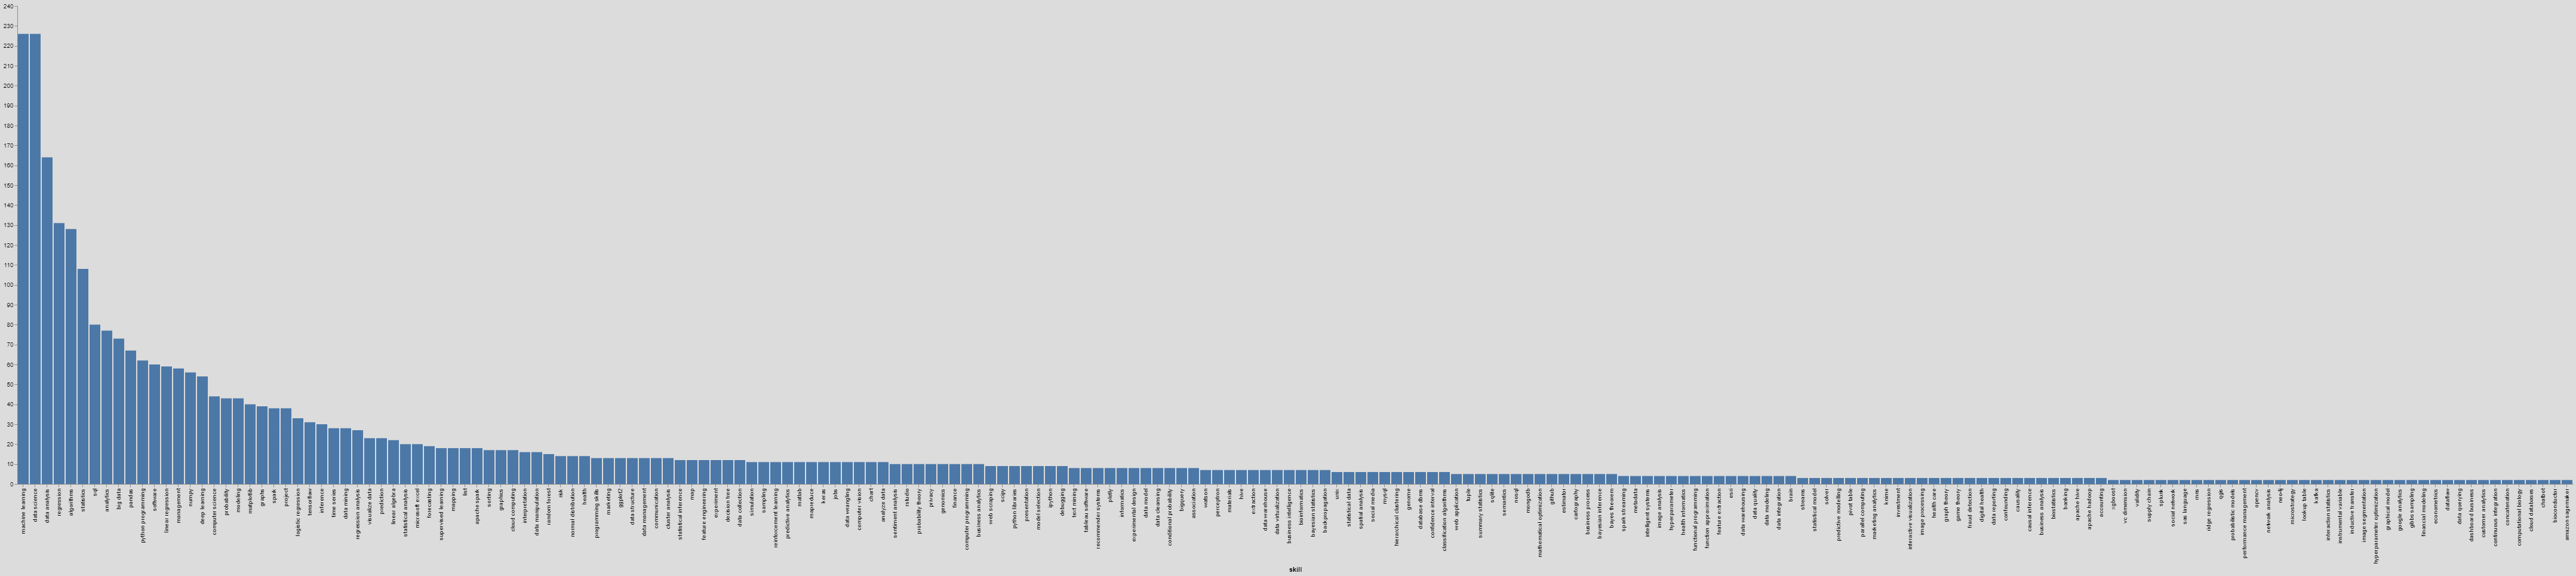

In [99]:
chart = alt.Chart(skills_graph).mark_bar().encode(
    x=alt.X('skill', sort = alt.Sort(field = 'value', order = 'descending')),
    y=alt.Y('value:Q', title = ""),
    tooltip = ['value']
).transform_filter(
    (alt.datum.value != 0) & (alt.datum.value != 1)
).properties(
height = 800)
chart.configure(
background = "#DCDCDC")

Even with removed noises (courses with 0 and 1 values) the graph contains a bit too many information to make any conclusions. So, to be able to draw conclusions the only info I will use is first 75 courses

## Hiearachical clustering used on skills data

To undestand how data is connected we will use this method.

In [100]:
import csv
import random
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import normalize
import scipy as scp
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean

%matplotlib inline

In [101]:
resulting_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Columns: 954 entries, skill to Improving Your Statistical Questions
dtypes: int64(953), object(1)
memory usage: 3.4+ MB


In [102]:
data_matrix = resulting_table.set_index('skill')
data_scaled = normalize(data_matrix)
data_scaled.shape

(466, 953)

In [103]:
distMatrix =  scp.spatial.distance.pdist(data_scaled, 'euclidean')
print(distMatrix)
Z = sch.linkage(distMatrix, 'weighted')

[1.         1.         1.41421356 ... 1.41421356 1.41421356 1.41421356]


[]

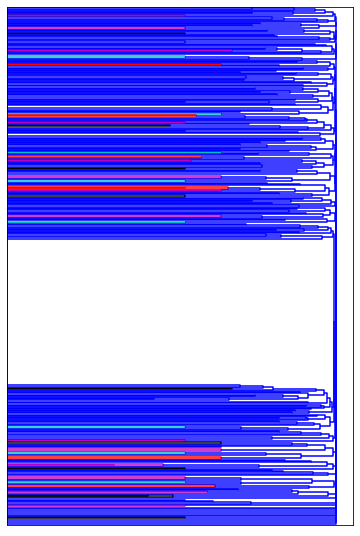

In [104]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])


Z1 = sch.dendrogram(Z, orientation='right')

ax1.set_xticks([])
ax1.set_yticklabels("")

plt.plot() # supress prints

With such amount of skills it's impossible to get any informative data. So here comes the selection of skills by their frequency. The idea is to sort skill by their abundance in courses and use top 75 to get some idea about data

In [105]:
resulting_table['value'] = resulting_table.sum(axis=1)


In [106]:
sortedtable = resulting_table.sort_values(by=['value'], ascending = False)

In [107]:
popular_skills = sortedtable.head(75)

[]

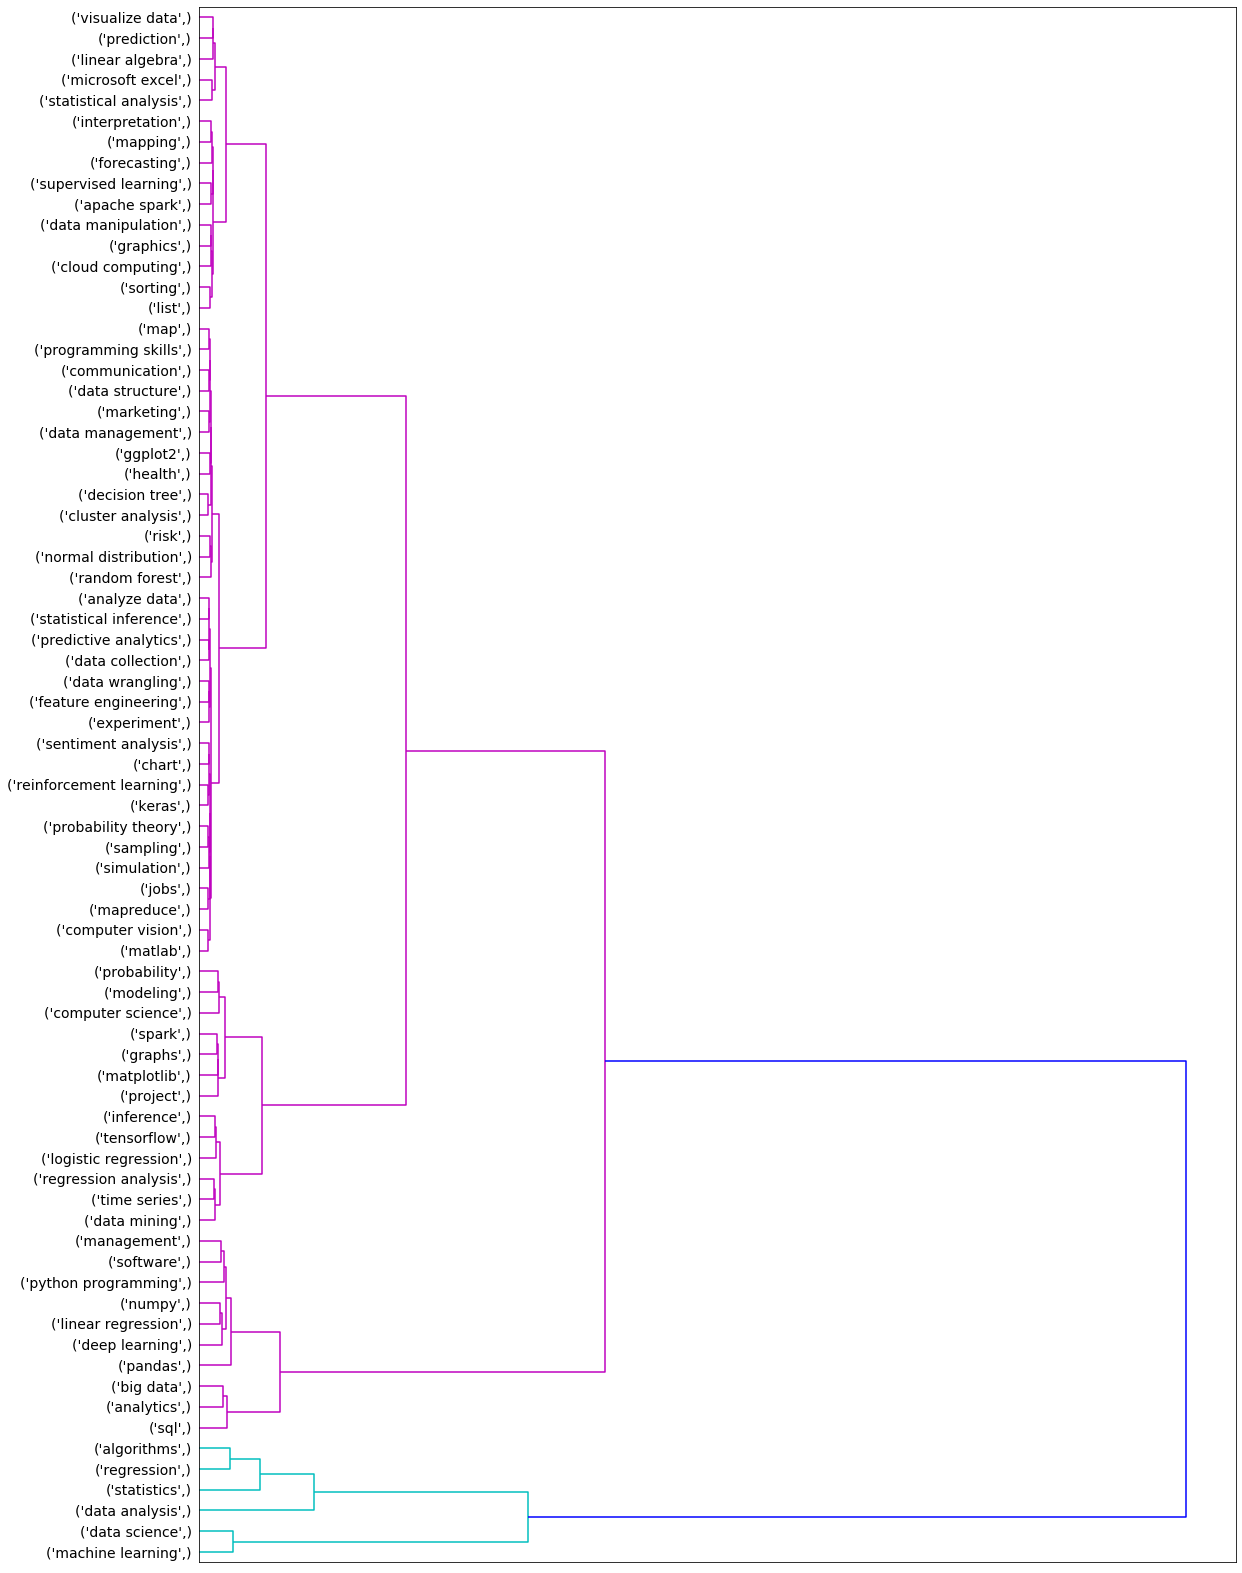

In [108]:
data_matrix = popular_skills.set_index('skill')

data_scaled = normalize(data_matrix)
distMatrix =  scp.spatial.distance.pdist(data_matrix, 'euclidean')
Z = sch.linkage(distMatrix, 'ward')
fig = plt.figure(figsize=(36,36))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])


Z1 = sch.dendrogram(Z, orientation='right')
labels = zip(data_matrix.index[Z1['leaves']])
ax1.set_xticks([])
ax1.set_yticklabels(labels)
ax1.tick_params(axis="y", labelsize=14)

plt.plot() # supress prints

Despite the fact that there are some pretty good looking clusters, they are not perfect.
Obviously, skills data needs clearing. <br>
First, there is need to remove 'data science' and manuall add some skills, nessesary to data scientists (as it appeared Coursera course description lack)
Those skills are inspired by data from Kdnuggets (found on internet, link: https://www.kdnuggets.com/2018/11/most-demand-skills-data-scientists.html) and also work made by other members of the team. I took only names of skills that were present in job descriptions.  <br>
The following pictures are ones that are found on internet and mostly used to extract names of the skills. Also, a bit further in thi notebook I will try to see how skills given in the course correlates with those that are needed in a job postings.
![title](img/general_skills.png)
![title](img/skill_data.jpg)


In [109]:
additional_skills = [
    'analysis', 'machine learning', 'statistics', 'computer science',
    'mathematics', 'ai', 'artificial intelligence', 'visualization',
    'deep learning', 'nlp', 'natural language processing',
    'software development', 'neural network', 'project management',
    'software engineering', 'data engineering'
]
tech_skills = [
    'python', 'r', 'sql', 'hadoop', 'spark', 'java', 'sas', 'tableau', 'hive',
    'scala', 'aws', 'c++', 'matlab', 'tensorflow', 'c', 'excel', 'nosql',
    'linux', 'scikit-learn', 'spss', 'pig', 'pandas', 'javascript', 'perl',
    'c#', 'numpy', 'keras', 'git', 'docker', 'mysql', 'hbase', 'mongodb',
    'cassandra', 'pytorch', 'd3', 'caffe'
]

In [110]:

corpus = udemy_data.skill
vectorizer = CountVectorizer(vocabulary=additional_skills,
                             ngram_range=(1, 2),
                             binary=True)
X = vectorizer.fit_transform(corpus.apply(lambda x: np.str_(x)))
# print(vectorizer.get_feature_names())
# print(X.toarray())
print(len(X.toarray()))
resulting_table = pd.DataFrame(additional_skills)
indx_ud, indx_edx, indx_crsra = 0, 0, 0
for iterv in X.toarray():
    if (indx_ud < 416):
        resulting_table[udemy.name[indx_ud]] = iterv
        indx_ud += 1
    elif(indx_edx < 285):
        resulting_table[edx_data.name[indx_edx]] = iterv
        indx_edx += 1
    else:
        resulting_table[coursera_data.name[indx_crsra]] = iterv
        indx_crsra += 1


984


In [111]:
resulting_table['skill'] = additional_skills

In [112]:
# run it once!
resulting_table['value'] = resulting_table.sum(axis=1)


In [168]:
skills_graph = pd.DataFrame()
skills_graph["skill"] = resulting_table.skill
skills_graph["value"] = resulting_table.value
skills_graph = skills_graph.set_index('skill')
skills_graph.loc["nlp"].value += skills_graph.loc["natural language processing"].value
skills_graph.loc["natural language processing"].value = 0
skills_graph.loc["ai"].value += skills_graph.loc["artificial intelligence"].value
skills_graph.loc["artificial intelligence"].value = 0
skills_graph = skills_graph.sort_values(by=['value'], ascending = False)
skills_graph = skills_graph.reset_index()[:-2]

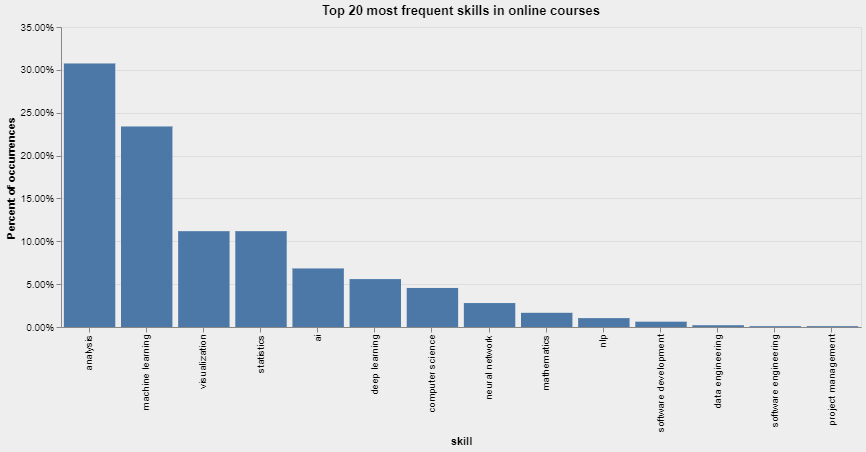

In [114]:
nr = 20
top = skills_graph.sort_values(by='value', ascending=False).head(nr)
chart = alt.Chart(top).transform_joinaggregate(
    totalsum='sum(value)').transform_calculate(
        PercentOfTotal="datum.value / datum.totalsum").mark_bar().encode(
            x=alt.X('skill', sort=alt.Sort(field='value', order='descending')),
            y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.2%', title = "Percent of occurrences")),
            tooltip=alt.Tooltip(['PercentOfTotal:Q'], format='.2%')
            #     (alt.datum.value != 0) & (alt.datum.value != 1)
        ).properties(width=800, title = "Top 20 most frequent skills in online courses")
chart.configure(background="#EEEEEE")

This data shows the difference between what is needed, according to previous findings in this field and what is found in data I have here. For example, there is less math, NLP and deep learning skills avaliable at online courses

Next - the spame is done, but for tech skills

In [115]:

vectorizer = CountVectorizer(vocabulary=tech_skills,
                             ngram_range=(1, 2),
                             binary=True)
X = vectorizer.fit_transform(corpus.apply(lambda x: np.str_(x)))
# print(vectorizer.get_feature_names())
# print(X.toarray())
print(len(X.toarray()))
resulting_table = pd.DataFrame(tech_skills)
indx_ud, indx_edx, indx_crsra = 0, 0, 0
for iterv in X.toarray():
    if (indx_ud < 416):
        resulting_table[udemy.name[indx_ud]] = iterv
        indx_ud += 1
    elif(indx_edx < 285):
        resulting_table[edx_data.name[indx_edx]] = iterv
        indx_edx += 1
    else:
        resulting_table[coursera_data.name[indx_crsra]] = iterv
        indx_crsra += 1

984


In [116]:
skills_graph = pd.DataFrame()
skills_graph["skill"] = resulting_table[0]
skills_graph["value"] = resulting_table.sum(axis=1)


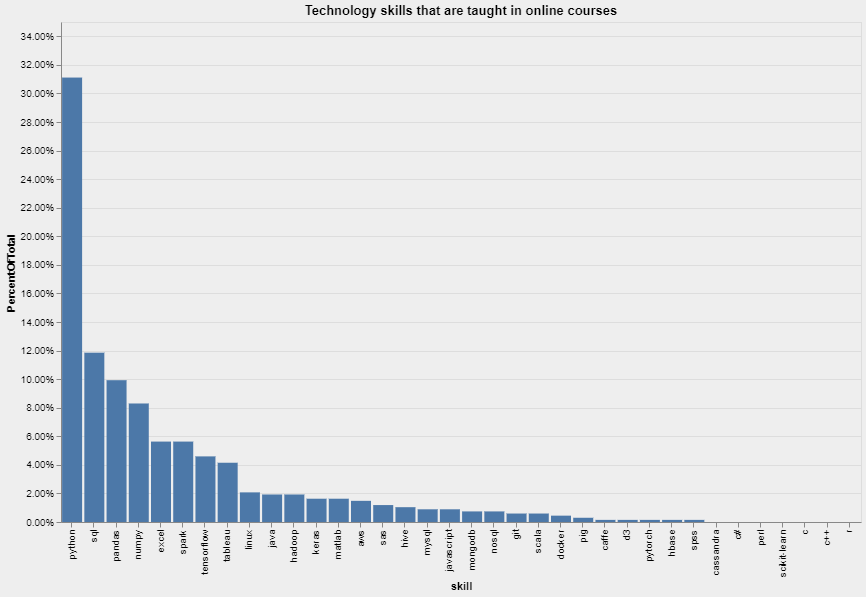

In [167]:
chart = alt.Chart(skills_graph).transform_joinaggregate(
    totalsum='sum(value)').transform_calculate(
        PercentOfTotal="datum.value / datum.totalsum").mark_bar().encode(
            x=alt.X('skill', sort=alt.Sort(field='value', order='descending')),
            y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.2%')),
            tooltip=alt.Tooltip(['PercentOfTotal:Q'], format='.2%')

            #     (alt.datum.value != 0) & (alt.datum.value != 1)
        ).properties(height = 500,width=800, title = "Technology skills that are taught in online courses")
chart.configure(background="#EEEEEE")

Here is interesting that there is no R and scikit-learn. Also, there is no c, c++, perl and c# tought online

So, my next step is to join all skills, make them be uniquely represented in a "bag of skills" and see, what the courses description will give according to those courses.

In [174]:
full_skills = pd.DataFrame()
full_skills['skills'] = unique_skills.skill

full_skills = full_skills.append(pd.DataFrame(additional_skills, columns = ['skills']))
full_skills = full_skills.append(pd.DataFrame(tech_skills, columns = ['skills']))
# .append( pd.DataFrame(tech_skills))
full_skills_data = pd.DataFrame(full_skills.skills.unique(), columns = ['skills'])


In [119]:
skills_to_drop = [
    'data science',
    'python programming',
    'jobs',
    'access remotely data sources on the web',
    'advanced machine learning',
    'algorithms on strings',
    'applied machine learning',
    'artificial intelligence (ai)',
    'association',
    'big data products',
    'clean and merge data',
    'construct a cox regression model in r',
    'data mining algorithms',
    'expertise in data science',
    'machine learning concepts',
    'materials',
    'model selection validation improvement',
    'programming in python',
    'project',
    'search for occurrences of a query graph',
    'simple model for market dynamics',
    'term frequency inverse document frequency tf-idf',
    'p-value',
    'p values',
    'list'
]

l3 = [x for x in full_skills_data.skills if x not in skills_to_drop]
len(l3)

476

In [120]:
clean_skills = pd.DataFrame(l3, columns = ['skills'])


In [121]:
vectorizer = CountVectorizer(vocabulary=clean_skills.skills,
                             ngram_range=(1, 2),
                             binary=True)
X = vectorizer.fit_transform(corpus.apply(lambda x: np.str_(x)))
# print(vectorizer.get_feature_names())
# print(X.toarray())
print(len(X.toarray()))
resulting_table = pd.DataFrame(clean_skills.skills)
indx_ud, indx_edx, indx_crsra = 0, 0, 0
for iterv in X.toarray():
    if (indx_ud < 416):
        resulting_table[udemy.name[indx_ud]] = iterv
        indx_ud += 1
    elif(indx_edx < 285):
        resulting_table[edx_data.name[indx_edx]] = iterv
        indx_edx += 1
    else:
        resulting_table[coursera_data.name[indx_crsra]] = iterv
        indx_crsra += 1

# resulting_table.head()

984


In [122]:
resulting_table['value'] = resulting_table.sum(axis=1)
sortedtable = resulting_table.sort_values(by=['value'], ascending = False)


In [123]:
skills_graph_clean = pd.DataFrame()
skills_graph_clean["skill"] = resulting_table["skills"]

skills_graph_clean["value"] = sortedtable["value"]
sortedtable = skills_graph_clean.sort_values(by=['value'], ascending = False)


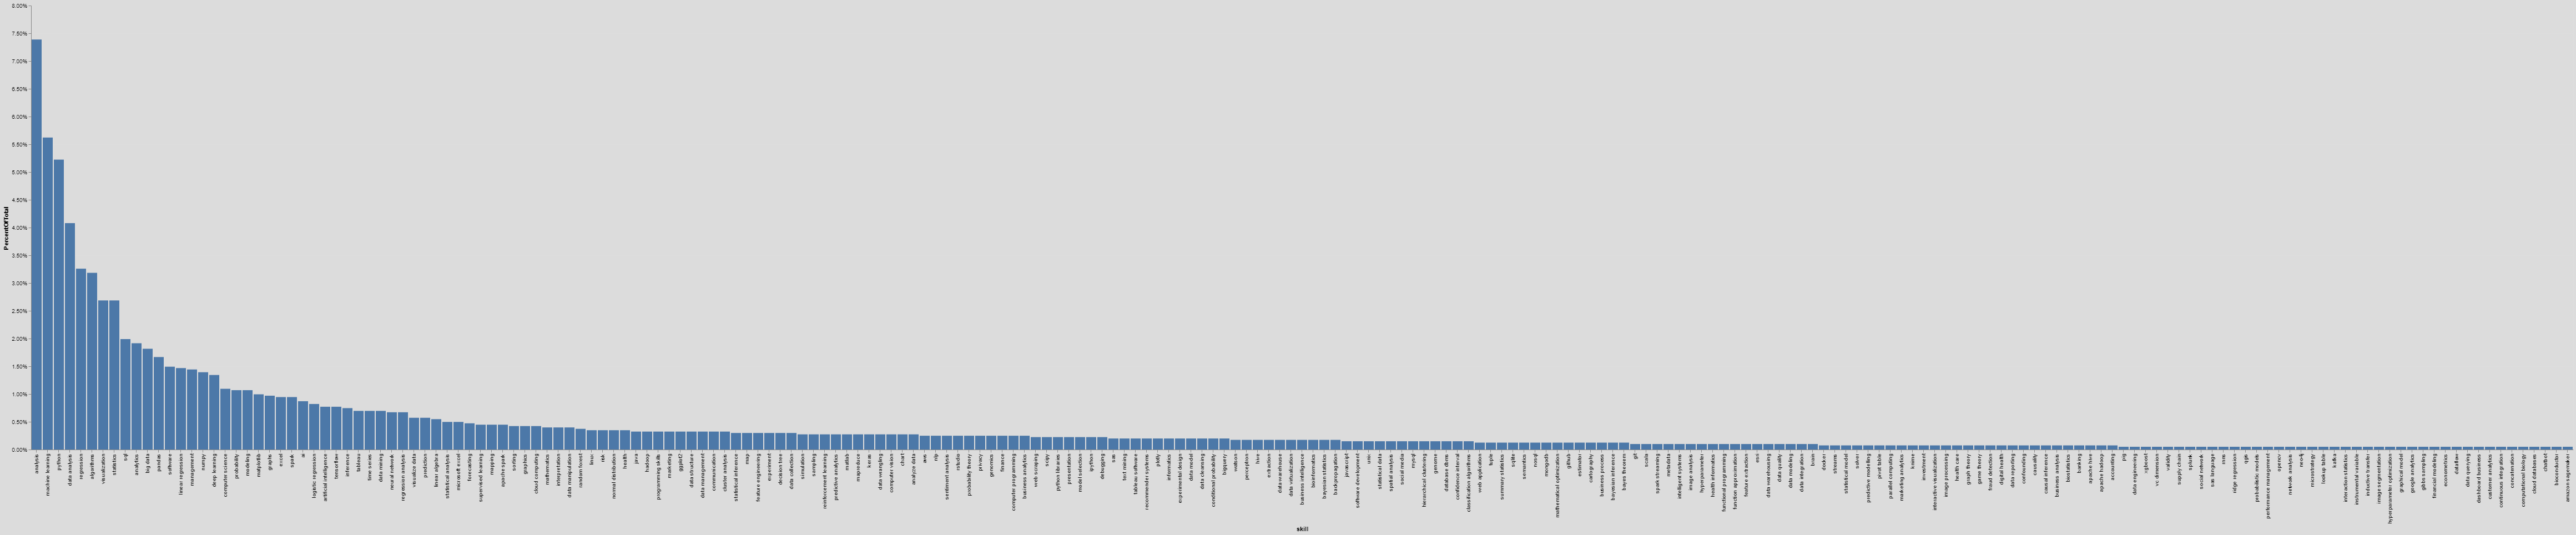

In [124]:
chart = alt.Chart(skills_graph_clean).transform_joinaggregate(
    totalsum='sum(value)').transform_calculate(
        PercentOfTotal="datum.value / datum.totalsum").mark_bar().encode(
            x=alt.X('skill', sort=alt.Sort(field='value', order='descending')),
            y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.2%')),
            tooltip=alt.Tooltip(
                ['PercentOfTotal:Q'], format='.2%')).transform_filter(
                    (alt.datum.value != 0)
                    & (alt.datum.value != 1)).properties(height=800)
chart.configure(background="#DCDCDC")

Now the task is to merge synonyms (like ai and artificial intelligence)

In [144]:
skills_graph_clean_sysnonyms = skills_graph_clean.set_index('skill')


In [145]:
skills_graph_clean_sysnonyms.loc['ai'].value = skills_graph_clean_sysnonyms.loc[
    'ai'].value + skills_graph_clean_sysnonyms.loc['artificial intelligence'].value
skills_graph_clean_sysnonyms.loc['artificial intelligence'].value = 0
#is is in str - sum values, merge, remove duplicate
# skills_graph_clean.loc['analysis of variance'].value = skills_graph_clean.loc['analysis of variance'].value + skills_graph_clean.loc['anova'].value
# skills_graph_clean.loc['anova'].value = 0

skills_graph_clean_sysnonyms.loc['visualization'].value = skills_graph_clean_sysnonyms.loc[
    'visualize data'].value + skills_graph_clean_sysnonyms.loc['visualization'].value
skills_graph_clean_sysnonyms.loc['visualize data'].value = 0

skills_graph_clean_sysnonyms.loc['git'].value = skills_graph_clean_sysnonyms.loc[
    'github'].value + skills_graph_clean_sysnonyms.loc['git'].value
skills_graph_clean_sysnonyms.loc['git'].value = 0

skills_graph_clean_sysnonyms.loc[
    'r'].value = skills_graph_clean_sysnonyms.loc['r'].value + skills_graph_clean_sysnonyms.loc[
        'r programming'].value + skills_graph_clean_sysnonyms.loc[
            'run basic analyses in r'].value
skills_graph_clean_sysnonyms.loc['r programming'].value = 0
skills_graph_clean_sysnonyms.loc['run basic analyses in r'].value = 0

skills_graph_clean_sysnonyms.loc['spark'].value = skills_graph_clean_sysnonyms.loc[
    'spark streaming'].value + skills_graph_clean_sysnonyms.loc['spark'].value + skills_graph_clean_sysnonyms.loc['apache spark'].value
skills_graph_clean_sysnonyms.loc['spark streaming'].value = 0
skills_graph_clean_sysnonyms.loc['apache spark'].value = 0

skills_graph_clean_sysnonyms.loc['scala'].value = skills_graph_clean_sysnonyms.loc[
    'scala programming'].value + skills_graph_clean_sysnonyms.loc['scala'].value
skills_graph_clean_sysnonyms.loc['scala programming'].value = 0

skills_graph_clean_sysnonyms.loc['excel'].value = skills_graph_clean_sysnonyms.loc[
    'microsoft excel'].value + skills_graph_clean_sysnonyms.loc['excel'].value
skills_graph_clean_sysnonyms.loc['microsoft excel'].value = 0

need_synonyms = [
    'analysis of variance (anova)', 'application programming interfaces (api)',
    'data visualization (dataviz)', 'dashboard (business)',
    'generalized linear mixed model (glmm)', 'github',
    'information retrieval (ir)', 'internet of things (iot)',
    'machine learning (ml) algorithms', 'markov chain monte carlo (mcmc)',
    'microsoft excel', 'natural language processing',
    'natural language processing (nlp)', 'natural language toolkit (nltk)',
    'object-oriented programming (oop)', 'p-value', 'p values',
    'principal component analysis (pca)', 'r programming',
    'regular expression (regex)', 'run and interpret kaplan-meier curves in r',
    'run basic analyses in r', 'search engine optimization (seo)',
    'spark streaming', 'stack (abstract data type)', 'scala programming',
    'term frequency inverse document frequency tf-idf'
]

In [146]:
# removed_skills = pd.DataFrame({"skills":skills_graph_clean['skill'], "value":skills_graph_clean['value']})

# removed_skills

skills_graph_clean_sysnonyms = skills_graph_clean_sysnonyms.reset_index()

skills_graph_clean_sysnonyms = skills_graph_clean_sysnonyms.sort_values(by=['value'], ascending = False)


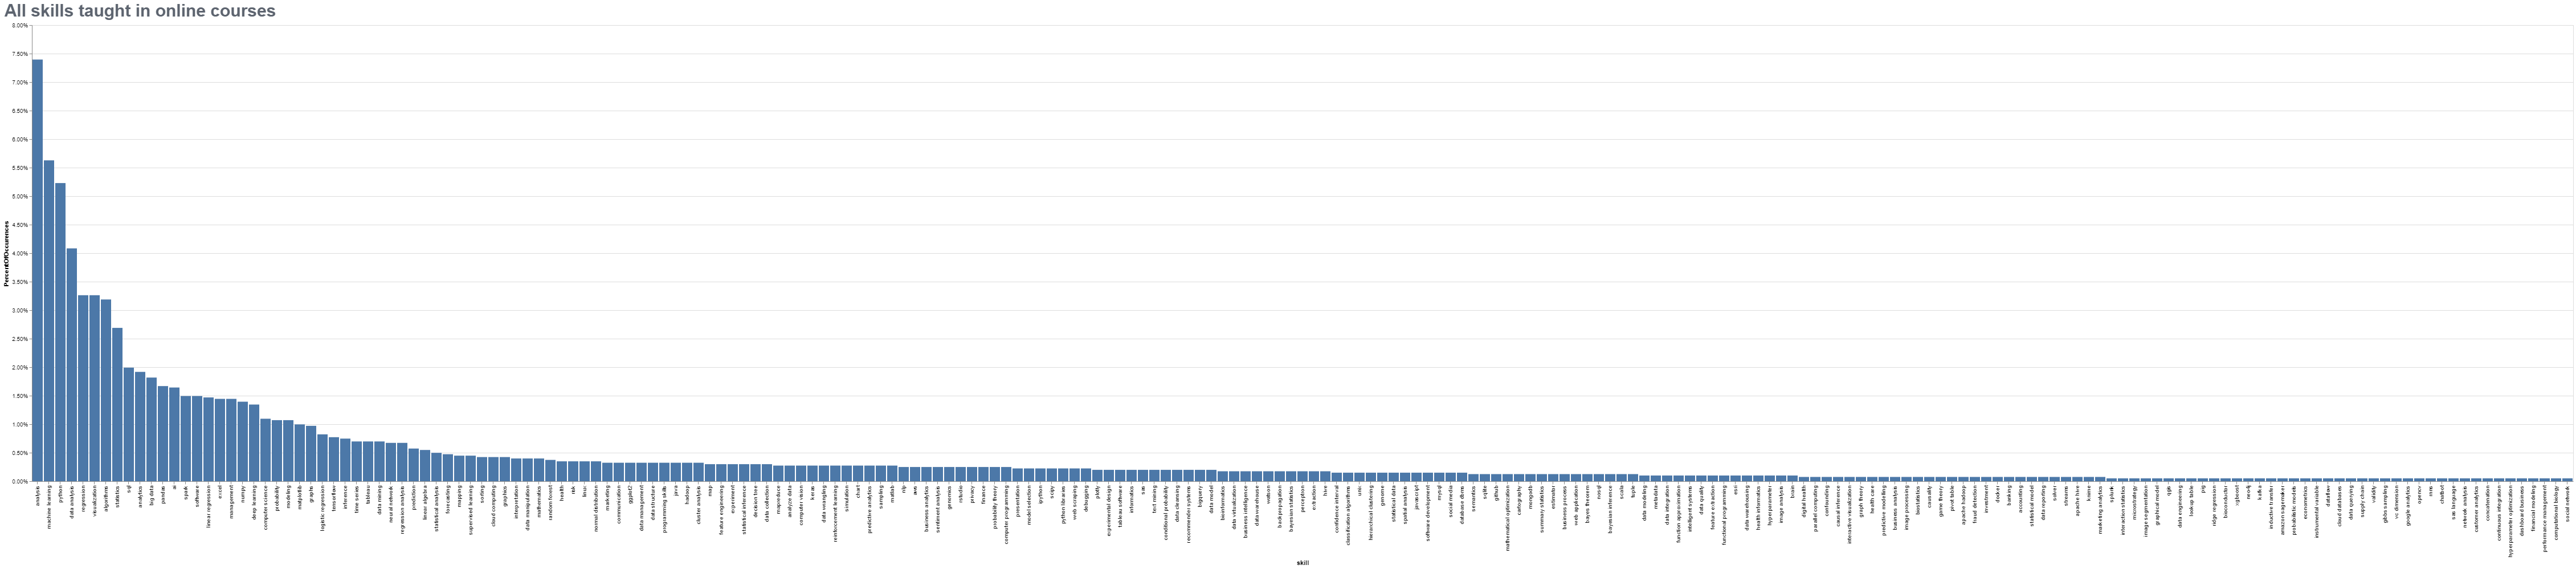

In [153]:
chart = alt.Chart(skills_graph_clean_sysnonyms).transform_joinaggregate(
    totalsum='sum(value)').transform_calculate(
        PercentOfOccurences="datum.value / datum.totalsum").mark_bar().encode(
            x=alt.X('skill', sort=alt.Sort(field='value', order='descending')),
            y=alt.Y('PercentOfOccurences:Q', axis=alt.Axis(format='.2%')),
            tooltip=alt.Tooltip(
                ['PercentOfOccurences:Q'], format='.2%')).transform_filter(
                    (alt.datum.value != 0)
                    & (alt.datum.value != 1)).properties(height=800, title = "All skills taught in online courses")
chart.configure(background="#eeeeee")
chart = chart.configure_title(
    fontSize=30,
    
    align='left',
    anchor='start',
    color='#5D646F',
    dx=2,
)
chart

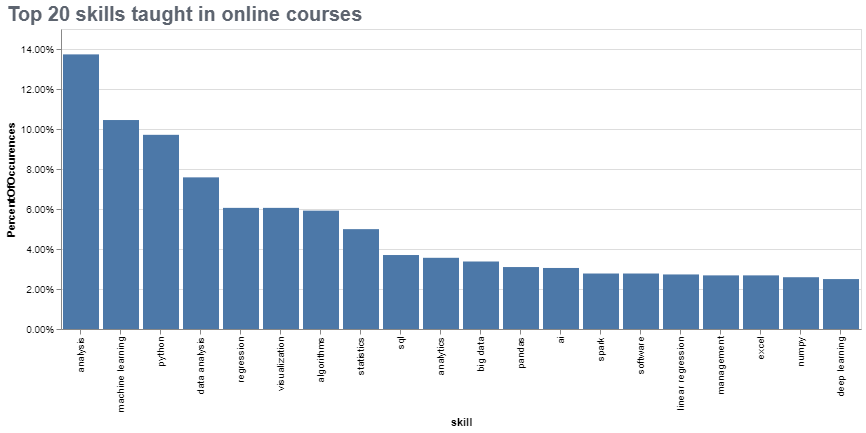

In [156]:
#top 20
nr = 20
top_synonyms = skills_graph_clean_sysnonyms.sort_values(by='value', ascending=False).head(nr)
chart = alt.Chart(top_synonyms).transform_joinaggregate(
    totalsum='sum(value)').transform_calculate(
        PercentOfOccurences="datum.value / datum.totalsum").mark_bar().encode(
            x=alt.X('skill', sort=alt.Sort(field='value', order='descending')),
            y=alt.Y('PercentOfOccurences:Q', axis=alt.Axis(format='.2%')),
            tooltip=alt.Tooltip(
                ['PercentOfOccurences:Q'], format='.2%')).transform_filter(
                    (alt.datum.value != 0)
                    & (alt.datum.value != 1)).properties(width=800, title = "Top 20 skills taught in online courses")
chart.configure(background="#eeeeee")
chart = chart.configure_title(
    fontSize=20,
    
    align='left',
    anchor='start',
    color='#5D646F',
    dx=2,
)
chart

According to the results, the most popular things that are taught online is analysis, machine learning, python, visualization, statistics and statistics methods and visualisation, along with libraries (numpy, pandas) and technologies (spark), AI, Deep Learning and excel

In [158]:

vectorizer = CountVectorizer(vocabulary=skills_graph_clean.skill,
                             ngram_range=(1, 2),
                             binary=True)
X = vectorizer.fit_transform(corpus.apply(lambda x: np.str_(x)))
# print(vectorizer.get_feature_names())
# print(X.toarray())
print(len(X.toarray()))
resulting_table = pd.DataFrame(skills_graph_clean.skill)
indx_ud, indx_edx, indx_crsra = 0, 0, 0
for iterv in X.toarray():
    if (indx_ud < 416):
        resulting_table[udemy.name[indx_ud]] = iterv
        indx_ud += 1
    elif(indx_edx < 285):
        resulting_table[edx_data.name[indx_edx]] = iterv
        indx_edx += 1
    else:
        resulting_table[coursera_data.name[indx_crsra]] = iterv
        indx_crsra += 1



984


# Clustering for cleaned skills data
The idea here is to see how skills are located in courses. The mathematical idea is if the skills appear more often in same course, so they are related  

In [159]:
resulting_table['value'] = resulting_table.sum(axis=1)
sortedtable = resulting_table.sort_values(by=['value'], ascending = False)
popular_skills = sortedtable.head(50)
popular_skills = popular_skills.set_index('skill')


At this piece of code I manually find synonyms and just merge their values and keep only one of synonyms in the data 

In [160]:
popular_skills.loc['ai'].value = popular_skills.loc[
    'ai'].value + popular_skills.loc['artificial intelligence'].value
popular_skills.loc['artificial intelligence'].value = 0
#is is in str - sum values, merge, remove duplicate
# skills_graph_clean.loc['analysis of variance'].value = skills_graph_clean.loc['analysis of variance'].value + skills_graph_clean.loc['anova'].value
# skills_graph_clean.loc['anova'].value = 0

popular_skills.loc['visualization'].value = popular_skills.loc[
    'visualize data'].value + popular_skills.loc['visualization'].value
popular_skills.loc['visualize data'].value = 0

# popular_skills.loc['git'].value = popular_skills.loc[
#     'github'].value + popular_skills.loc['git'].value

# popular_skills.loc[
#     'r programming'].value = popular_skills.loc[
#         'r programming'].value + popular_skills.loc[
#             'run basic analyses in r'].value
# popular_skills.loc['run basic analyses in r'].value = 0

popular_skills.loc['spark'].value =  popular_skills.loc['spark'].value + popular_skills.loc['apache spark'].value
popular_skills.loc['apache spark'].value = 0

popular_skills.loc['statistics'].value = popular_skills.loc[
    'statistics'].value + popular_skills.loc['statistical analysis'].value
popular_skills.loc['statistical analysis'].value = 0

popular_skills.loc['excel'].value = popular_skills.loc[
    'microsoft excel'].value + popular_skills.loc['excel'].value
popular_skills.loc['microsoft excel'].value = 0

popular_skills.loc['data analysis'].value = popular_skills.loc[
    'analysis'].value + popular_skills.loc['data analysis'].value
popular_skills.loc[
    'analysis'].value = 0
popular_skills.loc['data manipulation'].value = 0
popular_skills.loc['graphics'].value = 0
popular_skills.loc['sorting'].value = 0


In [161]:
popular_skill_all = popular_skills.sort_values(by=['value'], ascending = False)[:-9]

[]

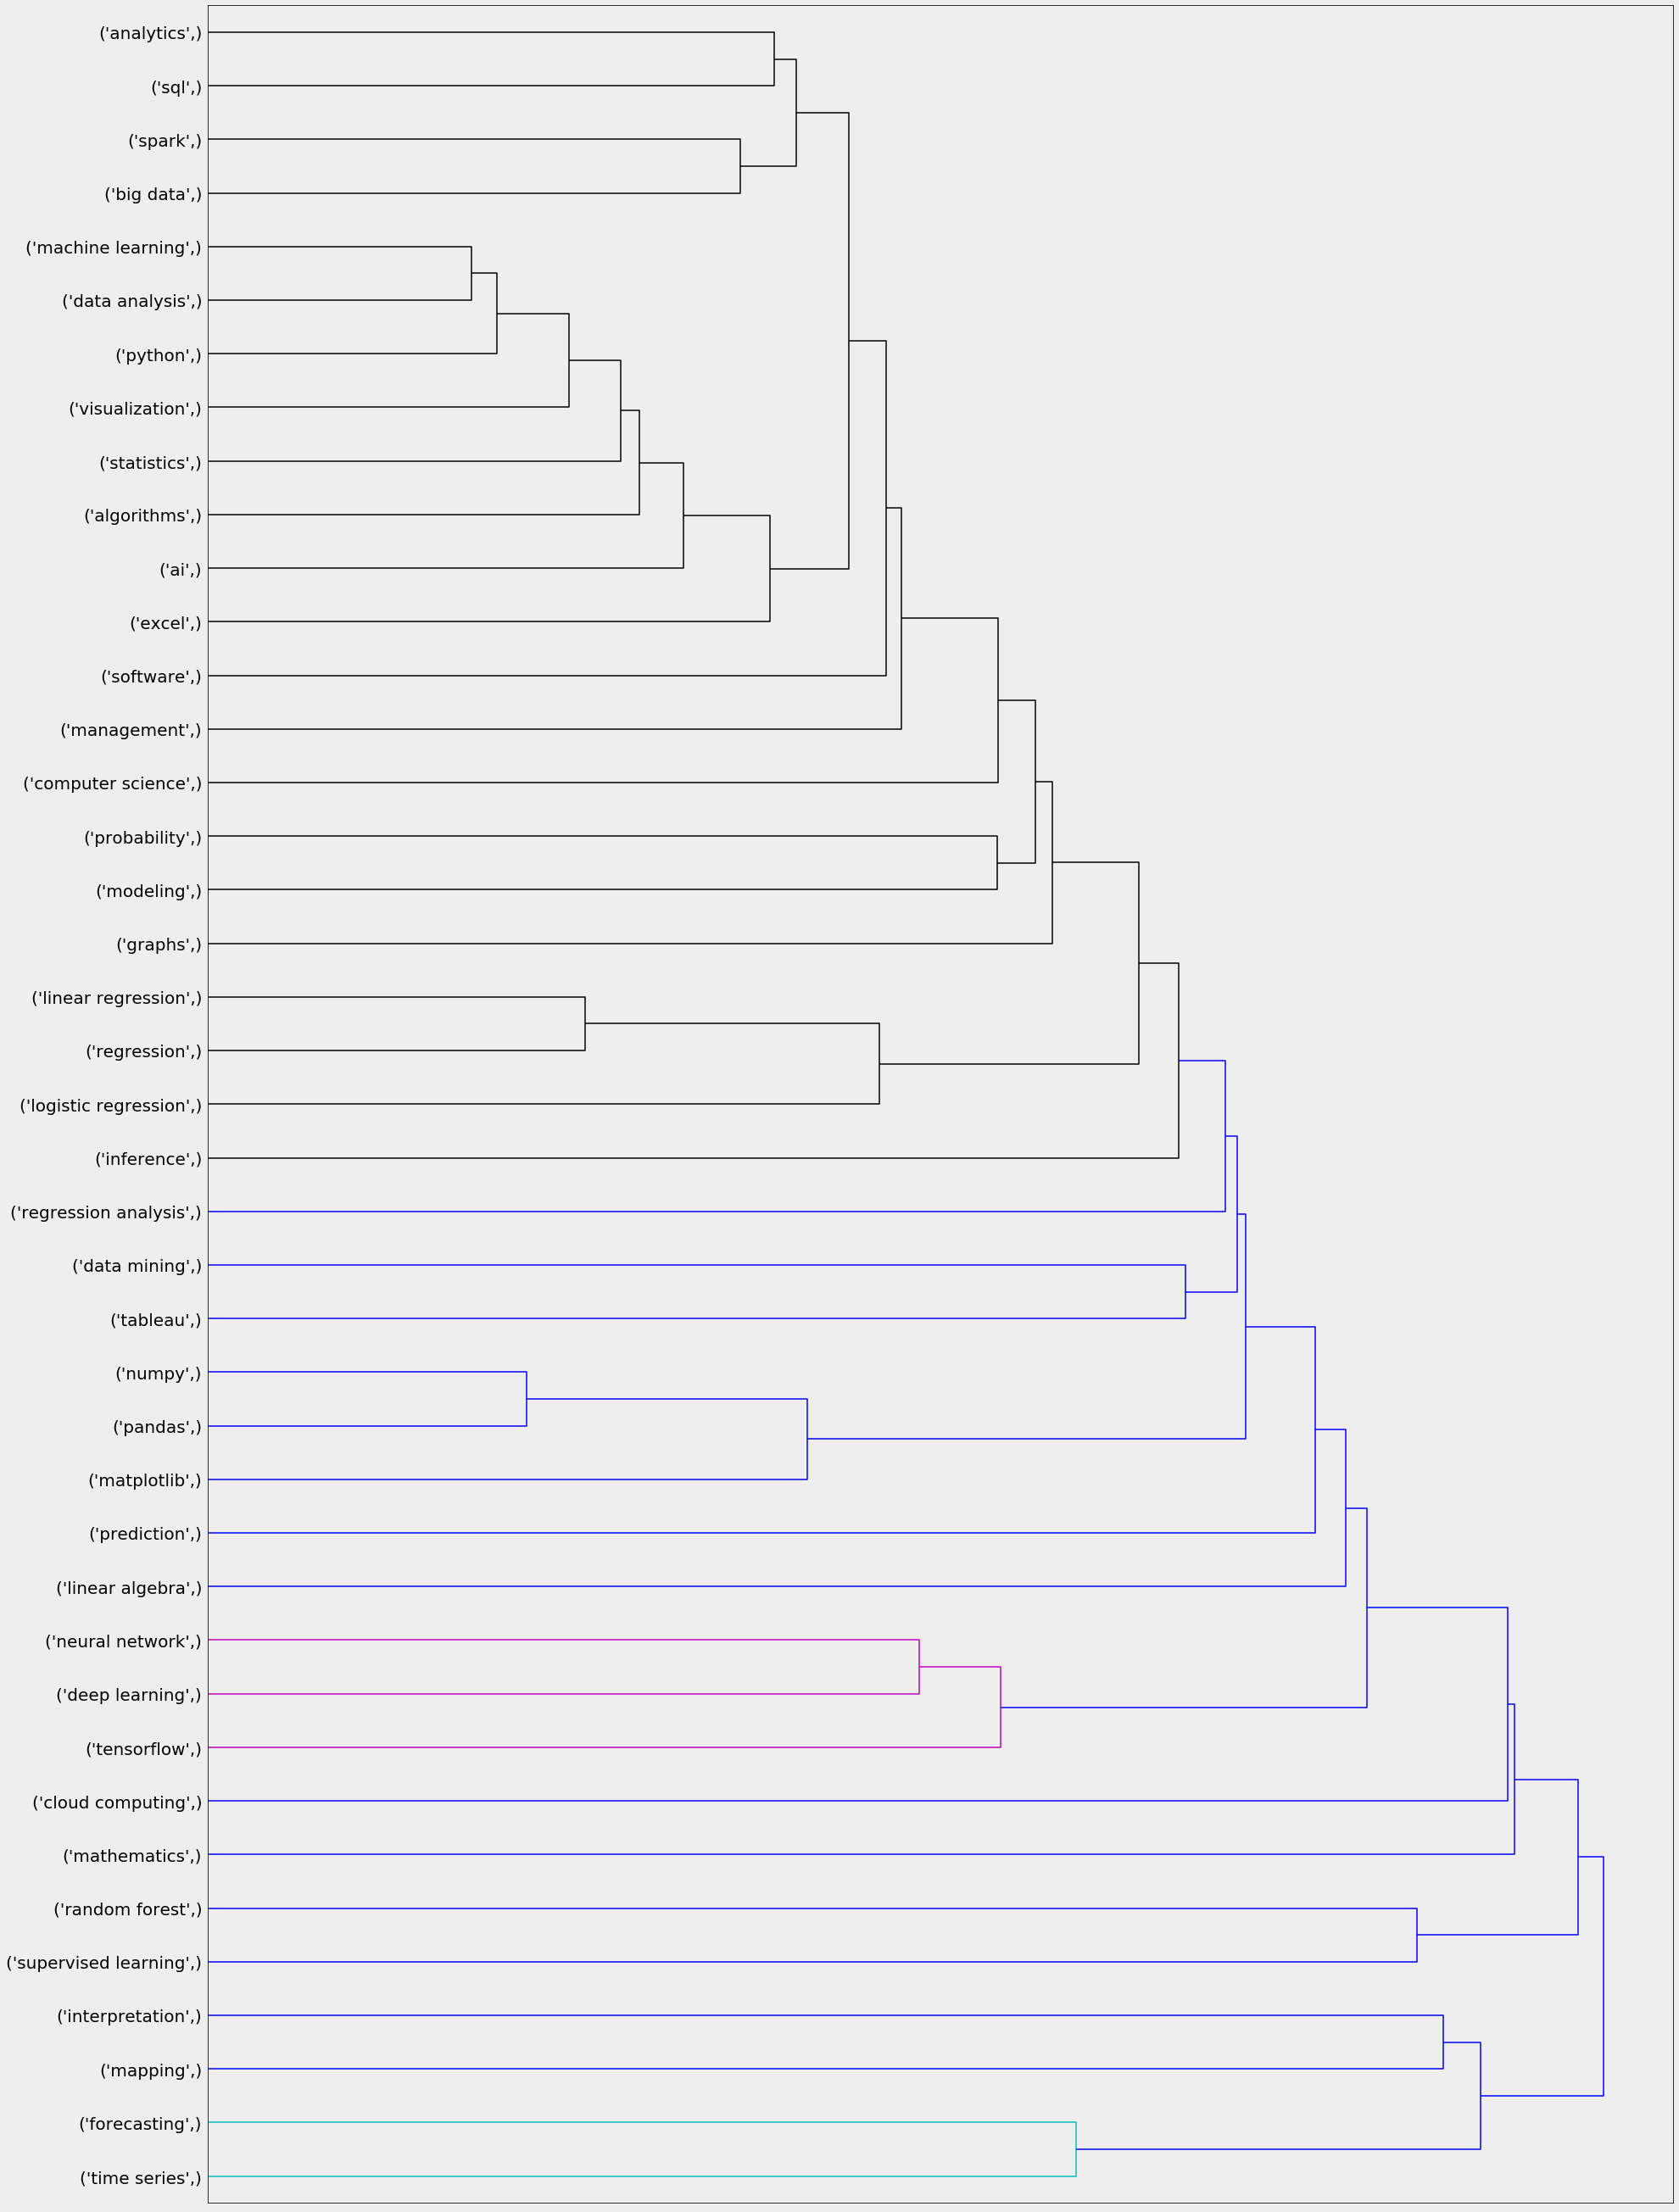

In [162]:

data_scal = normalize(popular_skill_all)
distanceMatrix =scp.spatial.distance.pdist(data_scal, 'euclidean')

ZZ = sch.linkage(distanceMatrix, 'ward')
fig = plt.figure(figsize=(60,60))
fig.patch.set_facecolor('#EEEEEE')
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
ax1.set_facecolor('#EEEEEE')
fontproperties = {'family':'sans-serif','weight' : 400, 'size' : 20}
Z2 = sch.dendrogram(ZZ, orientation='right', distance_sort=True )
sch.set_link_color_palette(['c', 'm', 'b', 'k', 'm', 'r'])

labels = zip(popular_skill_all.index[Z2['leaves']])
ax1.set_xticks([])
ax1.set_yticklabels(labels, fontproperties)
ax1.tick_params(axis="y", labelsize=20)

plt.plot() # supress prints

So, here are representation of 42 technical skills that are given by online courses in a form of clusters. The structure hints the courses and their curriculum. So, starting from the most obvious ones:
1. neural network + deep learning + tensorflow
2. numpy + pandas + matplotlib
3. linear regression + regression + logistic regression
4. python + machine learning + data analysis
5. analytics + spark + sql + big data
6. modelling + probability

Next, there are some skills that are need some extra discoveries:
1. data analysis and analysis can actually be considered as 1 skill (most likely it meant the same thing in given data)
2. software and management are most likely refer to all kind of software development sides and also might be considered as 1 skill
To continue conclusions I'd like to analyse the clusters by groups.
First, there is this part of graph:
![title](img/cluster01.png)


Looking on it, I'd say that python + machine learning + data analysis is obligatory course. I propose to join it with visualization and statistics. Courses like algorithms, ai and excel might be considered as additional or added in a curriculum if there is enough time that is dedicated to this course.<br>
This course will benefit from being tought along with probability and modellng. Those two courses might have additional graphs lessons as this skill is related to both of courses. <br>


Inference and regression analysis are good selective courses to  linear regression + regression + logistic regression

on this dendrogram it's interesting to see that 'tableau' is joined with 'data mining'. It might be interesting suggestion for the course

The next course is this one:
![title](img/cluster02.png)


And another two skills that are suggested to join in the one course is - 'random forest' and 'supervised learning'. Although, I'd suggest to add other methods for classification and regression.

There are some single skills, that are farther from other. I'd suggest making them as selective courses. <br>
Those courses are:
1. linear algebra
2. mathematics
3. cloud computing
4. prediction

They can be made selective for those who studied math and especially linear algebra in their previous places of study, but they might be suggested as obligatory for thos who didn't

# Soft skills

Here listed most populat soft-skills that are usually needed at any work

In [135]:
soft_skills = [
    'communication', 'teamwork', 'adaptability', 'problem-solving',
    'creativity', 'work ethic', 'interpersonal skills', 'time management',
    'leadership', 'attention to detail'
]

In [136]:

vectorizer = CountVectorizer(vocabulary=soft_skills,
                             ngram_range=(1, 2),
                             binary=True)
X = vectorizer.fit_transform(corpus.apply(lambda x: np.str_(x)))
# print(vectorizer.get_feature_names())
# print(X.toarray())
print(len(X.toarray()))
resulting_table = pd.DataFrame(soft_skills)
indx_ud, indx_edx, indx_crsra = 0, 0, 0
for iterv in X.toarray():
    if (indx_ud < 416):
        resulting_table[udemy.name[indx_ud]] = iterv
        indx_ud += 1
    elif(indx_edx < 285):
        resulting_table[edx_data.name[indx_edx]] = iterv
        indx_edx += 1
    else:
        resulting_table[coursera_data.name[indx_crsra]] = iterv
        indx_crsra += 1

984


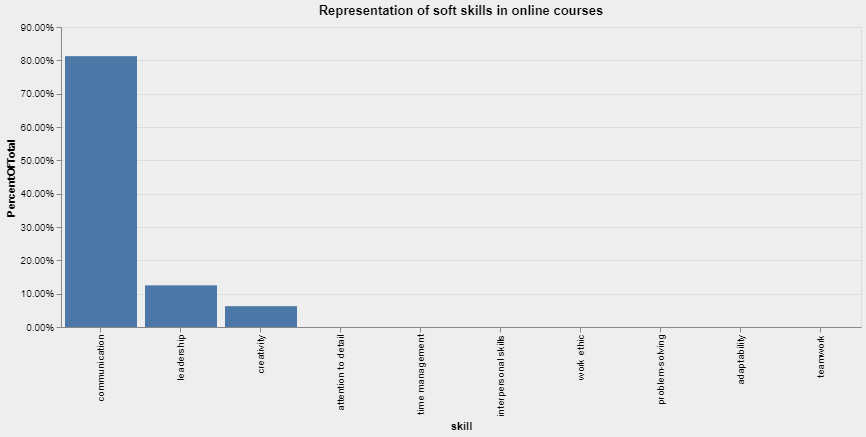

In [143]:
resulting_table['value'] = resulting_table.sum(axis=1)
sortedtable = resulting_table.sort_values(by=['value'], ascending = False)
skills_graph_clean_soft = pd.DataFrame()
skills_graph_clean_soft["skill"] = resulting_table[0]

skills_graph_clean_soft["value"] = sortedtable["value"]
sortedtable = skills_graph_clean_soft.sort_values(by=['value'], ascending = False)
chart = alt.Chart(skills_graph_clean_soft).transform_joinaggregate(
    totalsum='sum(value)').transform_calculate(
        PercentOfTotal="datum.value / datum.totalsum").mark_bar().encode(
            x=alt.X('skill', sort=alt.Sort(field='value', order='descending')),
            y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.2%')),
            tooltip=alt.Tooltip(
                ['PercentOfTotal:Q'], format='.2%')).properties(width=800, title = "Representation of soft skills in online courses")
chart.configure(background="#eeeeee")

It's seen that online-courses dedicated to data science mostly neglect soft-skills, so this is a good opportunity for a new programm - to offer soft-skills-dedicated course 